In [1]:
# 학습 : 파라미터 추정

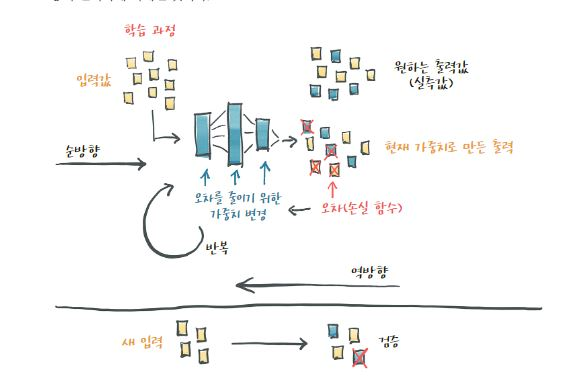

In [2]:
from IPython import display
display.Image("/content/65.jpg")

In [3]:
# 온도문제
import numpy as np
import torch
import matplotlib.pyplot as plt

In [4]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

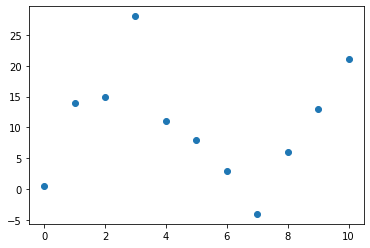

In [5]:
plt.scatter(range(len(t_c)), t_c)

In [6]:
t_c.sort().values

tensor([-4.0000,  0.5000,  3.0000,  6.0000,  8.0000, 11.0000, 13.0000, 14.0000,
        15.0000, 21.0000, 28.0000])

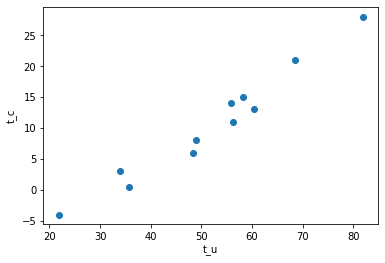

In [7]:
plt.scatter(t_u, t_c)
plt.xlabel('t_u')
plt.ylabel('t_c')
plt.show()

In [8]:
# t_c = w*t_u + b
# 손실함수 : 오차를 측정할 구체적인 방법을 정의한 함수
# 예측값을 t_p
# loss abs(t_p - t_c)  or  (t_p - t_c)**2
# 오차중에 가중치가 큰 샘플을 우선 적용

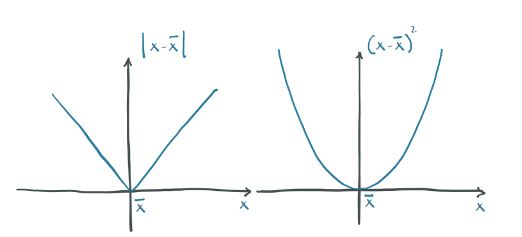

In [9]:
display.Image("/content/66.jpg")

In [10]:
def model(t_u, w, b):
  return w*t_u+b

def loss_fn(t_p,t_c):
  squared_error = (t_p - t_c)**2
  return squared_error.mean()

In [11]:
# 파라미터를 초기화
w = torch.ones(())
b = torch.zeros(())

In [12]:
t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [13]:
loss = loss_fn(t_p,t_c)
loss

tensor(1763.8848)

In [14]:
delta = 0.1
loss_rate_of_change_w = (loss_fn(model(t_u, w+delta,b),t_c) - loss_fn(model(t_u,w-delta,b),t_c)) / (delta*2)
loss_rate_of_change_w

tensor(4517.2974)

In [15]:
learning_rate = 1e-2
w = w-learning_rate * loss_rate_of_change_w
w

tensor(-44.1730)

In [16]:
loss_rate_of_change_b = (loss_fn(model(t_u,w,b+delta),t_c) - loss_fn(model(t_u,w, b-delta),t_c)) / (delta*2)
b = b-learning_rate * loss_rate_of_change_b
b

tensor(46.)

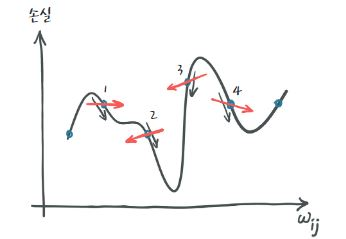

In [17]:
display.Image("/content/67.jpg")

In [18]:
# 도함수
def dloss_fn(t_p,t_c):
  dsq_diffs = 2*(t_p - t_c) / t_p.size(0)
  return dsq_diffs

In [19]:
# 미분함수(라고 가정 **실제 미분이 되지는 않음)
def model_dw(t_u,w,b):
  return t_u
def model_db(t_u,w,b):
  return 1.

In [20]:
# 경사함수
def grad_fn(t_u,t_c, t_p, w, b):
  dloss_dtp = dloss_fn(t_p,t_c)
  dloss_dw = dloss_dtp*model_dw(t_u,w,b)
  dloss_db = dloss_dtp*model_db(t_u,w,b)
  return torch.stack([dloss_dw.sum(), dloss_db.sum()])

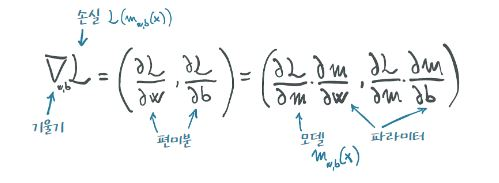

In [21]:
display.Image("/content/68.jpg")

In [22]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
  for epoch in range(1,n_epochs + 1):
    w,b = params
    
    # 순방향
    t_p = model(t_u,w,b)
    loss = loss_fn(t_p,t_c)

    # 역방향
    grad = grad_fn(t_u,t_c,t_p,w,b)

    paras = params - learning_rate * grad # 파라미터 업데이트
    print(f"epoch : {epoch} loss:{float(loss)} grad : {grad}")
  return params

In [23]:
# 실행

from prompt_toolkit.key_binding.bindings.vi import load_vi_search_bindings

# n_epochs, learning_rate,params, t_u, t_c

training_loop(n_epochs=100,learning_rate=1e-2, params=torch.tensor([1.0,0.0]),t_u=t_u,t_c =t_c)

epoch : 1 loss:1763.884765625 grad : tensor([4517.2964,   82.6000])
epoch : 2 loss:1763.884765625 grad : tensor([4517.2964,   82.6000])
epoch : 3 loss:1763.884765625 grad : tensor([4517.2964,   82.6000])
epoch : 4 loss:1763.884765625 grad : tensor([4517.2964,   82.6000])
epoch : 5 loss:1763.884765625 grad : tensor([4517.2964,   82.6000])
epoch : 6 loss:1763.884765625 grad : tensor([4517.2964,   82.6000])
epoch : 7 loss:1763.884765625 grad : tensor([4517.2964,   82.6000])
epoch : 8 loss:1763.884765625 grad : tensor([4517.2964,   82.6000])
epoch : 9 loss:1763.884765625 grad : tensor([4517.2964,   82.6000])
epoch : 10 loss:1763.884765625 grad : tensor([4517.2964,   82.6000])
epoch : 11 loss:1763.884765625 grad : tensor([4517.2964,   82.6000])
epoch : 12 loss:1763.884765625 grad : tensor([4517.2964,   82.6000])
epoch : 13 loss:1763.884765625 grad : tensor([4517.2964,   82.6000])
epoch : 14 loss:1763.884765625 grad : tensor([4517.2964,   82.6000])
epoch : 15 loss:1763.884765625 grad : tenso

tensor([1., 0.])

In [24]:
# params 조정과정이 너무크다
# 무한대로 : 더이상 학습이 안된경우
# nan 값이 커서 튕겨버림

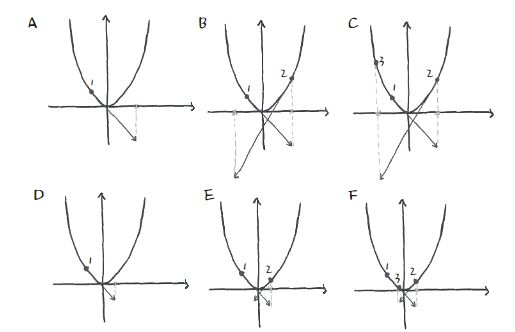

In [25]:
display.Image("/content/69.jpg")

In [26]:
training_loop(n_epochs=100,learning_rate=1e-4, params=torch.tensor([1.0,0.0]),t_u=t_u,t_c =t_c) 

epoch : 1 loss:1763.884765625 grad : tensor([4517.2964,   82.6000])
epoch : 2 loss:1763.884765625 grad : tensor([4517.2964,   82.6000])
epoch : 3 loss:1763.884765625 grad : tensor([4517.2964,   82.6000])
epoch : 4 loss:1763.884765625 grad : tensor([4517.2964,   82.6000])
epoch : 5 loss:1763.884765625 grad : tensor([4517.2964,   82.6000])
epoch : 6 loss:1763.884765625 grad : tensor([4517.2964,   82.6000])
epoch : 7 loss:1763.884765625 grad : tensor([4517.2964,   82.6000])
epoch : 8 loss:1763.884765625 grad : tensor([4517.2964,   82.6000])
epoch : 9 loss:1763.884765625 grad : tensor([4517.2964,   82.6000])
epoch : 10 loss:1763.884765625 grad : tensor([4517.2964,   82.6000])
epoch : 11 loss:1763.884765625 grad : tensor([4517.2964,   82.6000])
epoch : 12 loss:1763.884765625 grad : tensor([4517.2964,   82.6000])
epoch : 13 loss:1763.884765625 grad : tensor([4517.2964,   82.6000])
epoch : 14 loss:1763.884765625 grad : tensor([4517.2964,   82.6000])
epoch : 15 loss:1763.884765625 grad : tenso

tensor([1., 0.])

In [27]:
t_u_scaled = (t_u - t_u.mean())/t_u.std()
t_c_scaled = (t_c - t_c.mean())/t_c.std()
t_u_scaled, t_c_scaled     

(tensor([-0.9565,  0.2436,  0.3802,  1.7883,  0.2673, -0.1723, -1.0635, -1.7823,
         -0.2020,  0.5109,  0.9862]),
 tensor([-1.0856,  0.3800,  0.4885,  1.8998,  0.0543, -0.2714, -0.8142, -1.5741,
         -0.4885,  0.2714,  1.1399]))

In [28]:
params = training_loop(n_epochs=100,learning_rate=1e-4, params=torch.tensor([1.0,0.0]),t_u=t_u_scaled,t_c =t_c_scaled) 

epoch : 1 loss:0.03483753278851509 grad : tensor([ 3.4837e-02, -2.6822e-07])
epoch : 2 loss:0.03483753278851509 grad : tensor([ 3.4837e-02, -2.6822e-07])
epoch : 3 loss:0.03483753278851509 grad : tensor([ 3.4837e-02, -2.6822e-07])
epoch : 4 loss:0.03483753278851509 grad : tensor([ 3.4837e-02, -2.6822e-07])
epoch : 5 loss:0.03483753278851509 grad : tensor([ 3.4837e-02, -2.6822e-07])
epoch : 6 loss:0.03483753278851509 grad : tensor([ 3.4837e-02, -2.6822e-07])
epoch : 7 loss:0.03483753278851509 grad : tensor([ 3.4837e-02, -2.6822e-07])
epoch : 8 loss:0.03483753278851509 grad : tensor([ 3.4837e-02, -2.6822e-07])
epoch : 9 loss:0.03483753278851509 grad : tensor([ 3.4837e-02, -2.6822e-07])
epoch : 10 loss:0.03483753278851509 grad : tensor([ 3.4837e-02, -2.6822e-07])
epoch : 11 loss:0.03483753278851509 grad : tensor([ 3.4837e-02, -2.6822e-07])
epoch : 12 loss:0.03483753278851509 grad : tensor([ 3.4837e-02, -2.6822e-07])
epoch : 13 loss:0.03483753278851509 grad : tensor([ 3.4837e-02, -2.6822e-

In [29]:
t_p = model(t_u_scaled,*params)

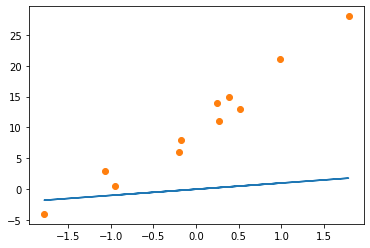

In [30]:
plt.plot(t_u_scaled.numpy(),t_p.detach().numpy() )
plt.plot(t_u_scaled.numpy(),t_c.numpy(),'o' )

In [31]:
# 자동미분
params = torch.tensor([1.0,0.0], requires_grad=True)

In [32]:
params.grad is None

True

In [33]:
loss = loss_fn(model(t_u,*params),t_c)

In [34]:
loss.backward()

In [35]:
params.grad is None

False

In [36]:
params.grad

tensor([4517.2969,   82.6000])